In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(context='notebook', style='darkgrid',palette='dark', font_scale=1.2)
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline

<AxesSubplot:>

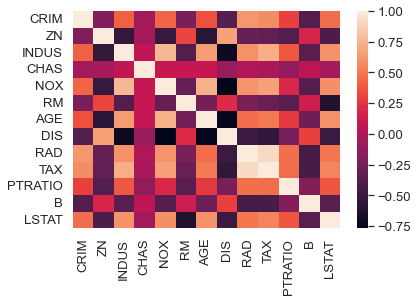

In [117]:
# Loading Dataset
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
sns.heatmap(boston_df.corr())

In [119]:
class LinearRegression:
    def fit(self, X, y, alpha=0.01, max_iter=30):
        def gradientDescent(X, y, alpha, max_iter):
            m = X.shape[0]
            theta = np.random.randn(X.shape[1]+1)

            # Appending a column in X-matrix for Intercept
            X = np.append(X, np.ones((X.shape[0], 1)), axis=1)

            # Until Converge
            for _ in range(max_iter):
                # Matrix-Multiplication to get y_pred
                y_pred = X.dot(theta)
                gradient = (1/m) * X.T.dot(y_pred - y)
                theta -= alpha * gradient
            return theta
        self.theta=gradientDescent(X,y,alpha,max_iter)

    def predict(self,X):
        try:
            m=X.shape[0]
            X = np.append(X, np.ones((m, 1)), axis=1)
            y_pred=X.dot(self.theta)
            return y_pred
        except:
            raise Exception("Fit the model properly !")


In [120]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([-5.99720201e+107, -6.02604894e+107, -3.92966525e+107,
       -3.92329714e+107, -3.99588195e+107, -3.41678637e+107,
       -3.78579449e+107, -3.02210606e+107, -6.15279303e+107,
       -6.24481813e+107, -4.33556942e+107, -4.04995760e+107,
       -3.70810021e+107, -6.49880857e+107, -4.20051890e+107,
       -4.62210456e+107, -4.39168360e+107, -6.00457591e+107,
       -4.47061340e+107, -6.15874068e+107, -3.63724788e+107,
       -4.13737123e+107, -3.85320629e+107, -3.82874739e+107,
       -6.19432273e+107, -4.85429258e+107, -6.21060202e+107,
       -4.45511202e+107, -4.62089408e+107, -4.07160809e+107,
       -3.72904568e+107, -6.23351995e+107, -4.66838901e+107,
       -4.17899785e+107, -4.33185076e+107, -4.43679366e+107,
       -5.50598515e+107, -4.81680497e+107, -3.75298382e+107,
       -6.22048081e+107, -4.56792748e+107, -3.45031520e+107,
       -4.49225720e+107, -4.42773485e+107, -4.72807236e+107,
       -4.10301480e+107, -3.55452958e+107, -5.66690044e+107,
       -4.10072271e+107,

Text(0.5, 1.0, 'Predicted-Values')

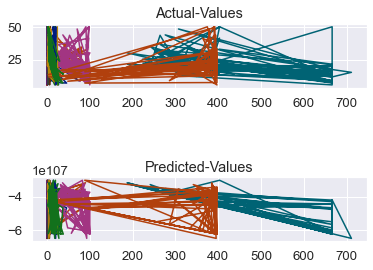

In [121]:
plt.subplot(3, 1, 1)
plt.plot(X_test, y_test)
plt.title("Actual-Values")


plt.subplot(3, 1, 3)
plt.plot(X_test, y_pred)
plt.title("Predicted-Values")


`SK-Learns Model Prediction`

In [122]:
from sklearn.linear_model import LinearRegression as Lin_Reg
sk_model=Lin_Reg()
sk_model.fit(X_train,y_train)
sk_pred=sk_model.predict(X_test)

Text(0.5, 1.0, 'Sk-learns Predicted-Values')

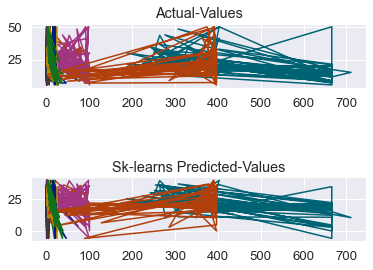

In [123]:
plt.subplot(3, 1, 1)
plt.plot(X_test, y_test)
plt.title("Actual-Values")


plt.subplot(3, 1, 3)
plt.plot(X_test, sk_pred)
plt.title("Sk-learns Predicted-Values")

In [124]:
my_mse = mean_squared_error(y_test, y_pred)
my_r2 = r2_score(y_test, y_pred)

sk_mse = mean_squared_error(y_test, sk_pred)
sk_r2 = r2_score(y_test, sk_pred)

print("My Mean Squared Error: ", my_mse)
print("My R-squared: ", my_r2)
print("sk-learns Mean Squared Error: ", sk_mse)
print("sk-learns R-squared: ", sk_r2)

My Mean Squared Error:  2.0788275766291915e+215
My R-squared:  -2.2929736875704768e+213
sk-learns Mean Squared Error:  24.318238309170475
sk-learns R-squared:  0.7317666881184415
